In [ ]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklego.linear_model import LADRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_curve, roc_auc_score, f1_score)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

Note: you may need to restart the kernel to use updated packages.


In [3]:
\
# Fetch dataset
covertype = fetch_ucirepo(id=31)

# Get the features DataFrame
X = covertype.data.features

# Print all column names
print("All columns in the dataset:")
for column in X.columns:
    print(column)

# Print the total number of columns
print(f"\nTotal number of columns: {len(X.columns)}")

All columns in the dataset:
Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area1
Soil_Type1
Soil_Type2
Soil_Type3
Soil_Type4
Soil_Type5
Soil_Type6
Soil_Type7
Soil_Type8
Soil_Type9
Soil_Type10
Soil_Type11
Soil_Type12
Soil_Type13
Soil_Type14
Soil_Type15
Soil_Type16
Soil_Type17
Soil_Type18
Soil_Type19
Soil_Type20
Soil_Type21
Soil_Type22
Soil_Type23
Soil_Type24
Soil_Type25
Soil_Type26
Soil_Type27
Soil_Type28
Soil_Type29
Soil_Type30
Soil_Type31
Soil_Type32
Soil_Type33
Soil_Type34
Soil_Type35
Soil_Type36
Soil_Type37
Soil_Type38
Soil_Type39
Soil_Type40
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4

Total number of columns: 54


In [4]:


# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# Convert X and y into a single DataFrame
# Assuming that X and y are already in compatible formats
df = pd.DataFrame(X)
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

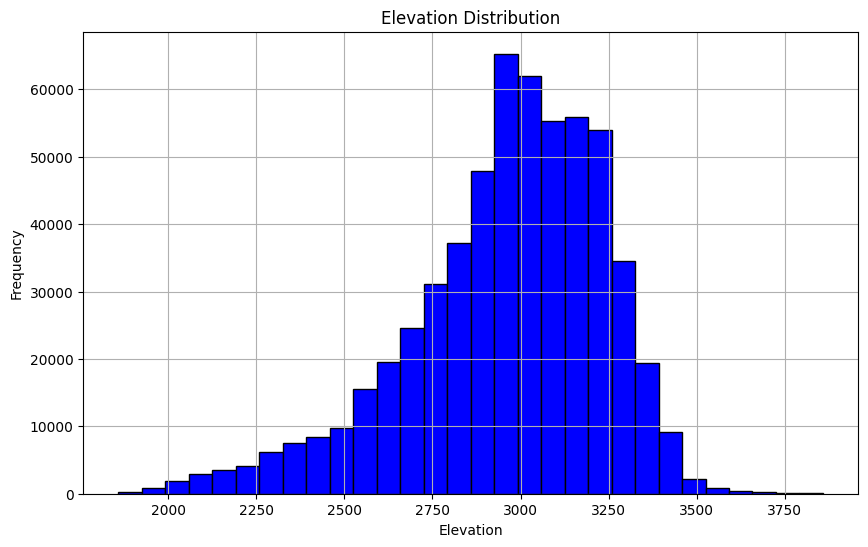

In [5]:
import matplotlib.pyplot as plt

# Plot a histogram of the Elevation column
plt.figure(figsize=(10, 6))
plt.hist(df['Elevation'], bins=30, color='blue', edgecolor='black')
plt.title('Elevation Distribution')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

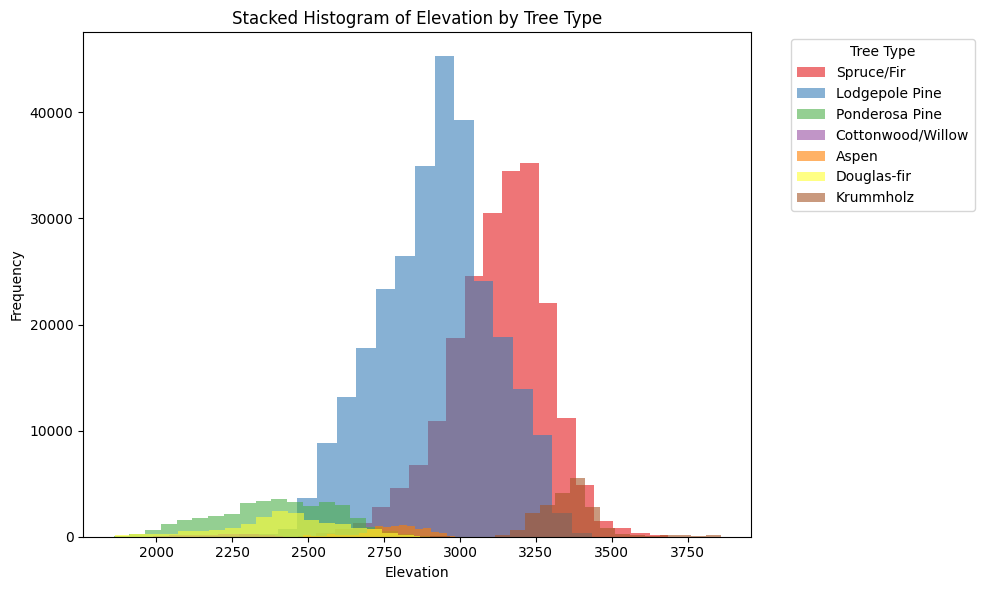

In [6]:
# Visualize how the elevation is split between each tree type

# Set up plot
plt.figure(figsize=(10, 6))
bins = 20
colors = sns.color_palette("Set1", 7)

# Rename variables
tree_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"    
}

# Plot each histogram
for i in range(1, 8):
    subset = df[df['Target'] == i]
    plt.hist(subset['Elevation'], bins=bins, alpha=0.6, label=tree_names[i], color=colors[i-1], stacked=True)

# Add labels/title and plot
plt.title("Stacked Histogram of Elevation by Tree Type")
plt.xlabel("Elevation")
plt.ylabel("Frequency")
plt.legend(title='Tree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We can see that Spruce/Fir and Lodgepole Pines occur at elevations primarily between 2500-3500, Ponderosa Pines and Douglass-fir occur at lower elevations (between 2000-2750)

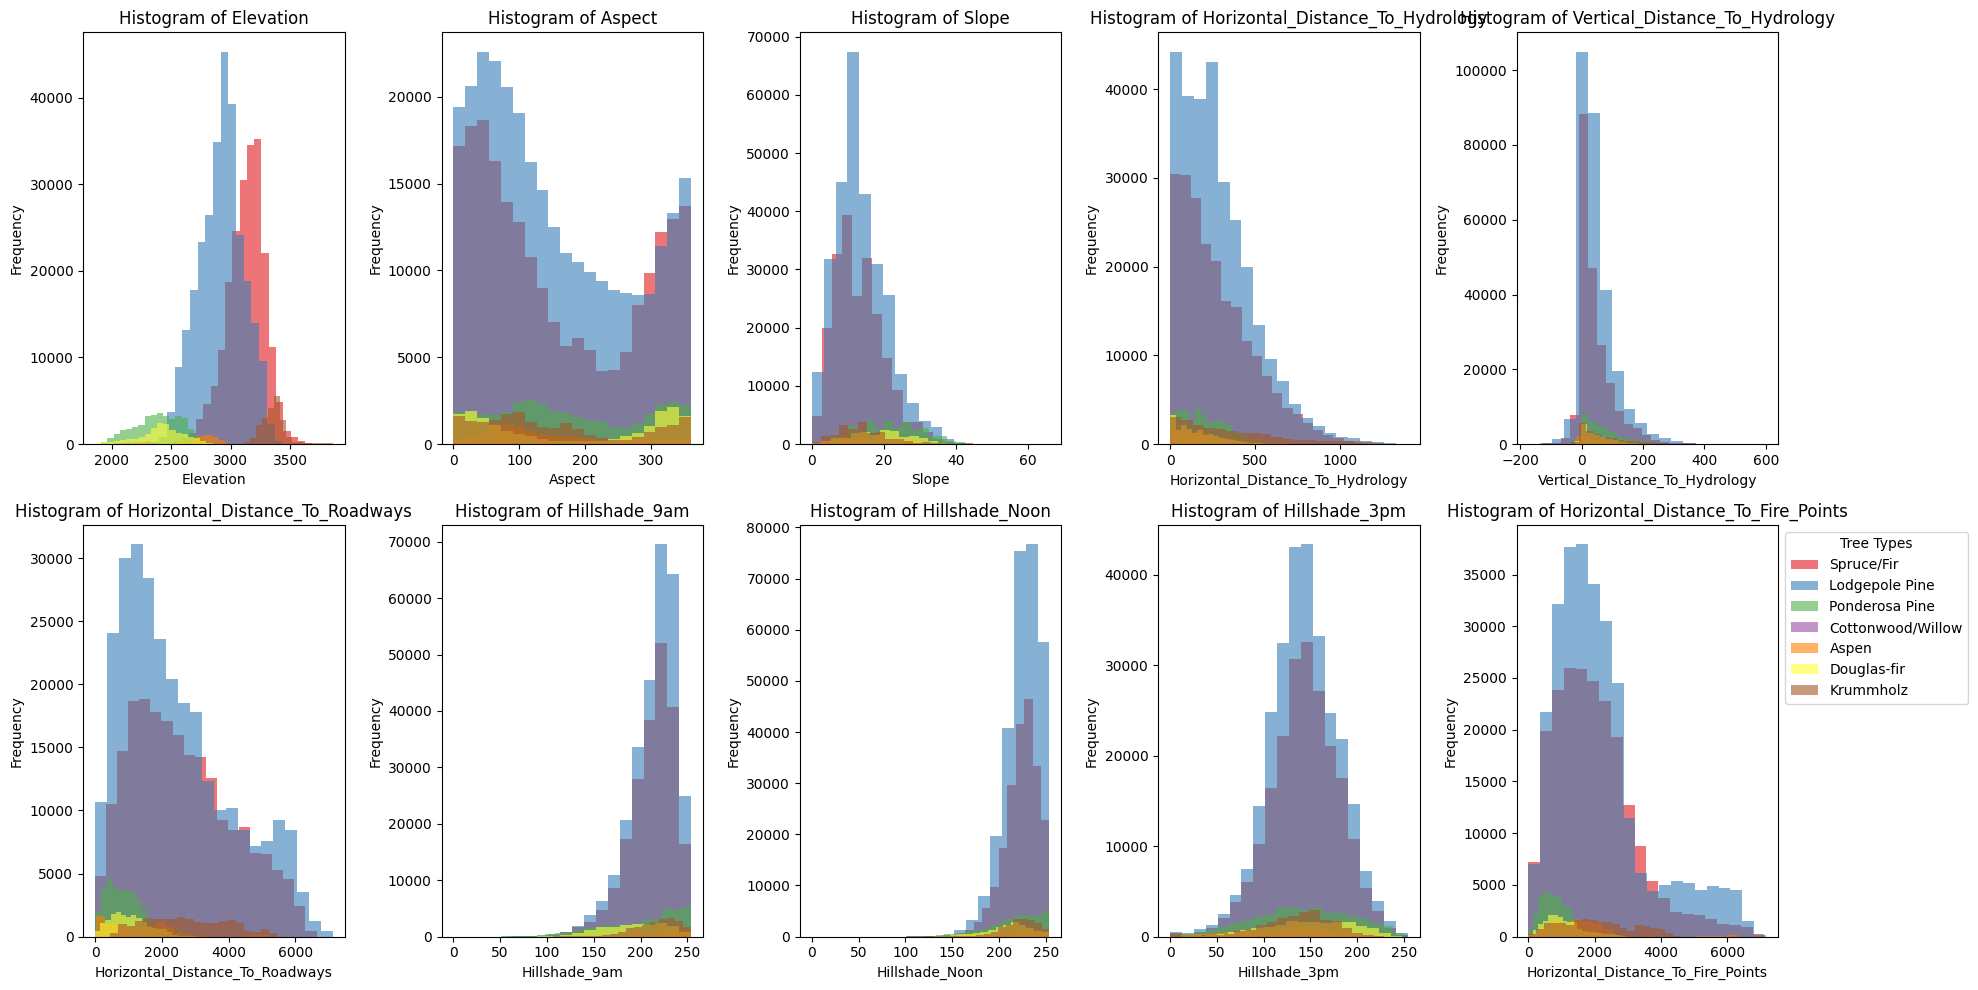

In [7]:
# Rename variables
tree_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"    
}

# Define the variables
variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10)) 
axes = axes.flatten()
bins = 20
colors = sns.color_palette("Set1", 7)

# Plot stacked histograms for each variable
for i, variable in enumerate(variables):
    ax = axes[i]  

    for tree_type in range(1, 8):
        # Filter the data for the specific tree type
        subset = df[df['Target'] == tree_type]

        # Plot the histogram for the current tree type's values of the variable
        ax.hist(subset[variable], bins=bins, alpha=0.6, 
                label=tree_names[tree_type], 
                color=colors[tree_type-1], stacked=True)

    # Customize the plot for this variable
    ax.set_title(f"Histogram of {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
ax.legend(title='Tree Types', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Visualizing the different variables it appears that Elevation, Horizontal Distance to Roadways and Fire Points may be the easiest to use for a predictor model because they appear to be the most spread out of all the variables

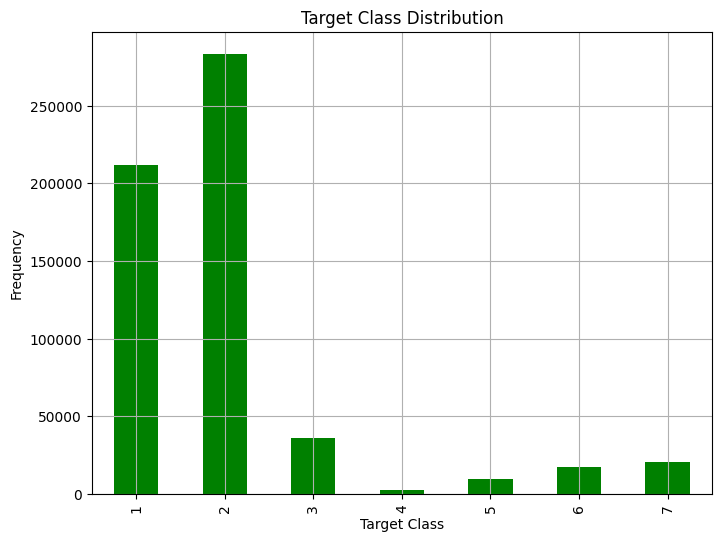

In [8]:
# Visualize the Target Class Distribution

plt.figure(figsize=(8, 6))
df['Target'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Target Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There are significantly more recorded instances of Spruce/Fir and Lodgepole Pines as opposed to the other tree types

In [9]:
# Filter columns that are related to Soil Type
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Display the Soil Type columns
print("Soil Types Columns:")
print(soil_columns)

# Now, let's print the first few rows of the Soil Type data
soil_data = df[soil_columns]
print("\nFirst 5 rows of Soil Type Data:")
print(soil_data)

Soil Types Columns:
['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

First 5 rows of Soil Type Data:
        Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4    

In [10]:
# Filter columns that are related to Soil Type
soil_columns = [col for col in X.columns if 'Soil_Type' in col]

# Count the number of 1s for each soil type
soil_counts = X[soil_columns].sum().sort_values(ascending=False)

# Create a DataFrame with the counts
soil_counts_df = pd.DataFrame({'Soil Type': soil_counts.index, 'Count': soil_counts.values})

# Display the counts
print(soil_counts_df)

# Check for any soil types with zero occurrences
zero_soil_types = soil_counts[soil_counts == 0]
if not zero_soil_types.empty:
    print("\nSoil types with zero occurrences:")
    print(zero_soil_types)
else:
    print("\nAll soil types have at least one occurrence.")

      Soil Type   Count
0   Soil_Type29  115247
1   Soil_Type23   57752
2   Soil_Type32   52519
3   Soil_Type33   45154
4   Soil_Type22   33373
5   Soil_Type10   32634
6   Soil_Type30   30170
7   Soil_Type12   29971
8   Soil_Type31   25666
9   Soil_Type24   21278
10  Soil_Type13   17431
11  Soil_Type38   15573
12  Soil_Type39   13806
13  Soil_Type11   12410
14   Soil_Type4   12396
15  Soil_Type20    9259
16  Soil_Type40    8750
17   Soil_Type2    7525
18   Soil_Type6    6575
19   Soil_Type3    4823
20  Soil_Type19    4021
21  Soil_Type17    3422
22   Soil_Type1    3031
23  Soil_Type16    2845
24  Soil_Type26    2589
25  Soil_Type18    1899
26  Soil_Type35    1891
27  Soil_Type34    1611
28   Soil_Type5    1597
29   Soil_Type9    1147
30  Soil_Type27    1086
31  Soil_Type28     946
32  Soil_Type21     838
33  Soil_Type14     599
34  Soil_Type25     474
35  Soil_Type37     298
36   Soil_Type8     179
37  Soil_Type36     119
38   Soil_Type7     105
39  Soil_Type15       3

All soil types 

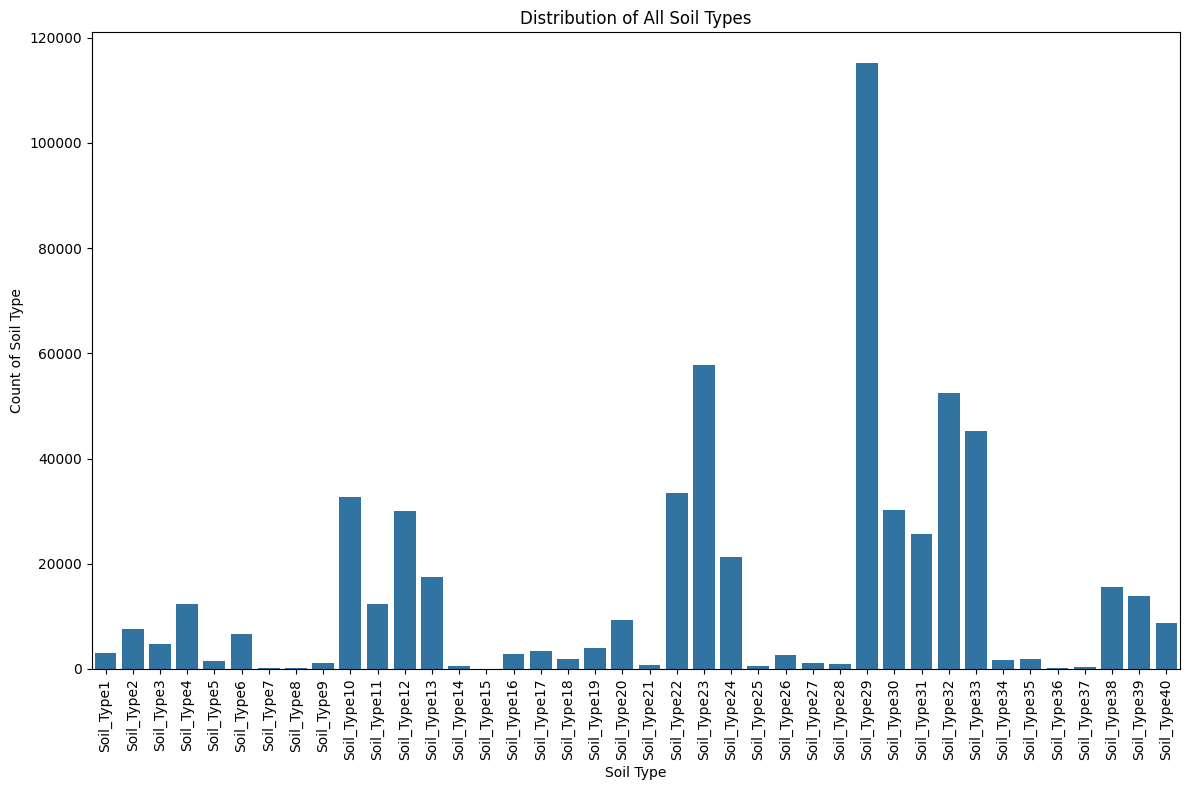

In [11]:
import seaborn as sns
# Filter columns that are related to Soil Type
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Summing up the occurrences of each soil type across all rows
soil_counts = df[soil_columns].sum()

# Plotting the bar graph for all soil types
plt.figure(figsize=(12,8))
sns.barplot(x=soil_counts.index, y=soil_counts.values)
plt.title("Distribution of All Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count of Soil Type")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


Soil types where there are no observations in the data (7, 8, 14, 15, 21, 25, 26, 27, 28, 34, 35, 36, 37, etc.) we will data clean to exclude. We will use L1 and L2 regression, and determine which gives the line of best fit, in order to analyze our data.





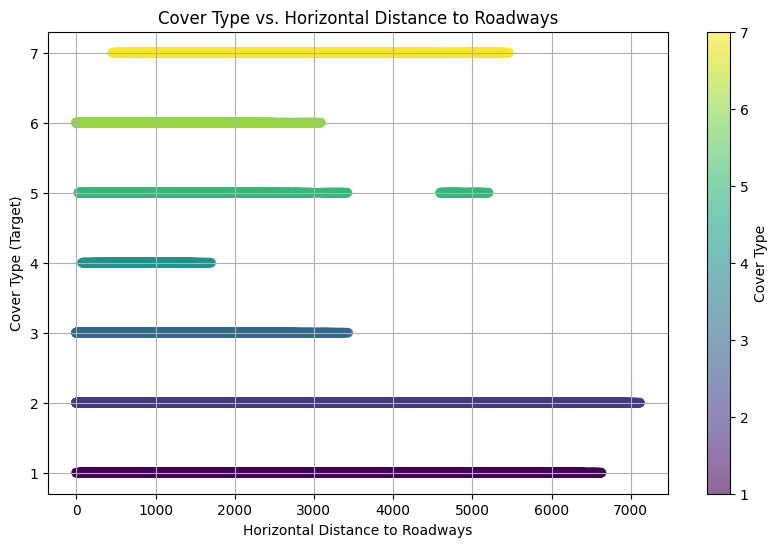

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Horizontal_Distance_To_Roadways'], df['Target'], alpha=0.6, c=df['Target'], cmap='viridis')
plt.title('Cover Type vs. Horizontal Distance to Roadways')
plt.xlabel('Horizontal Distance to Roadways')
plt.ylabel('Cover Type (Target)')
plt.colorbar(label='Cover Type')
plt.grid(True)
plt.show()

In [13]:
%pip install scikit-lego
%pip install sklego

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
# First, split the data into training and temp (which will later be split into validation and testing)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42) # the random state will ensure we will all start at the same point

# Now split the temp data into validation and testing sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the sizes of each set
print(f'Training set size: {train_data.shape[0]}')
print(f'Validation set size: {val_data.shape[0]}')
print(f'Test set size: {test_data.shape[0]}')

Training set size: 348607
Validation set size: 116202
Test set size: 116203


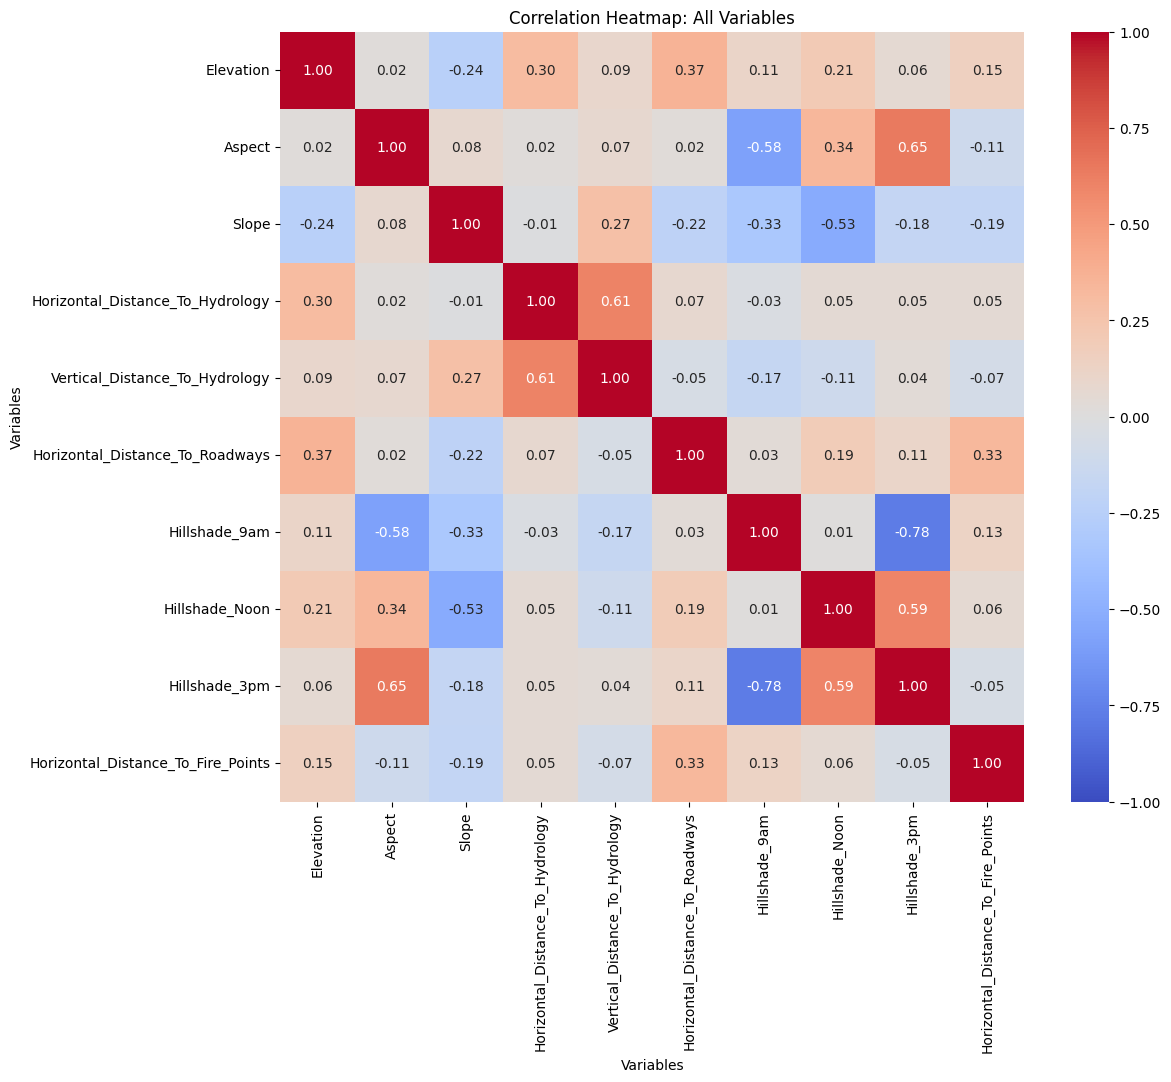

In [15]:
# Since we are predicting Cover Type (Target), we need to figure out what variable to use and we want to make sure to check out possible colinearity

# Calculate the full correlation matrix for the dataset (dropping the binary variables)
correlation = train_data.drop(
    train_data.filter(like='Soil_Type').columns.append(train_data.filter(like='Wilderness_Area').columns.append(train_data.filter(like='Target').columns)), 
    axis=1
)

correlation_matrix = correlation.corr()

# Visualize the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap: All Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

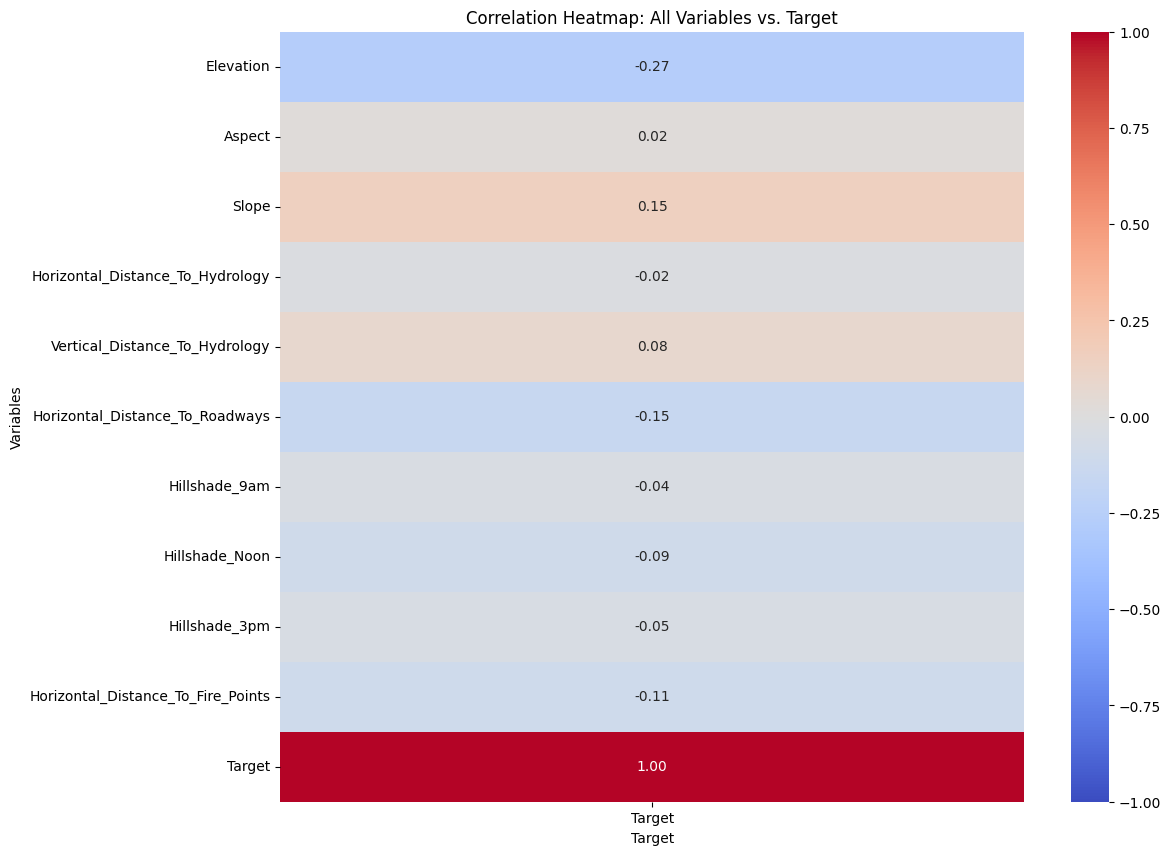

In [16]:
# Since we are predicting Cover Type (Target), we need to figure out what variable to use

# Calculate the full correlation matrix for the dataset (dropping the binary variables)
correlation = train_data.drop(
    train_data.filter(like='Soil_Type').columns.append(train_data.filter(like='Wilderness_Area').columns), 
    axis=1
)
correlation_matrix = correlation.corr()
target_corr = correlation_matrix[['Target']]

# Visualize the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap: All Variables vs. Target')
plt.xlabel('Target')
plt.ylabel('Variables')
plt.show()

Elevation is the most highley corrrelated followed by slope, horizontal distance to roadways and horizontal distance to fire points, which we predicted from looking at the histograms above.

In [17]:
# Check for colinearity amongst the x variables

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

# Sample the data
sample_df = train_data.sample(n=1000, random_state=77)

# Fit the LAD regression model
lad_fit = LADRegression()
lad_fit.fit(X=np.array(sample_df["Horizontal_Distance_To_Hydrology"]).reshape(-1, 1),
            y=sample_df["Horizontal_Distance_To_Fire_Points"])

# Get the intercept and coefficient
intercept = lad_fit.intercept_
coef = lad_fit.coef_[0]

# Calculate predicted values
sample_df['predicted'] = intercept + coef * sample_df["Horizontal_Distance_To_Hydrology"]

# Plot the LAD fitted line on top of the scatterplot
fig = px.scatter(sample_df, x="Horizontal_Distance_To_Hydrology", y="Horizontal_Distance_To_Fire_Points")
fig.add_trace(
    go.Scatter(
        x=sample_df["Horizontal_Distance_To_Hydrology"],
        y=sample_df['predicted'],
        mode='lines',
        name='LAD Fitted Line'
    )
)

fig.show()

In [18]:
# Sample the data
sample_df = train_data.sample(n=1000, random_state=19)

# Fit the LAD regression model
lad_fit = LADRegression()
lad_fit.fit(X=np.array(sample_df["Elevation"]).reshape(-1, 1),
            y=sample_df["Horizontal_Distance_To_Fire_Points"])

# Get the intercept and coefficient
intercept = lad_fit.intercept_
coef = lad_fit.coef_[0]

# Calculate predicted values
sample_df['predicted'] = intercept + coef * sample_df["Elevation"]

# Plot the LAD fitted line on top of the scatterplot
fig = px.scatter(sample_df, x="Elevation", y="Horizontal_Distance_To_Fire_Points")
fig.add_trace(
    go.Scatter(
        x=sample_df["Elevation"],
        y=sample_df['predicted'],
        mode='lines',
        name='LAD Fitted Line'
    )
)

fig.show()

In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklego.linear_model import LADRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

# Sample the data
sample_df = train_data.sample(n=1000, random_state=42)

# Fit the LAD regression model
lad_fit = LADRegression()
lad_fit.fit(X=np.array(sample_df["Slope"]).reshape(-1, 1),
            y=sample_df["Horizontal_Distance_To_Fire_Points"])

# Get the intercept and coefficient
intercept = lad_fit.intercept_
coef = lad_fit.coef_[0]

# Calculate predicted values
sample_df['predicted'] = intercept + coef * sample_df["slope"]

# Plot the LAD fitted line on top of the scatterplot
fig = px.scatter(sample_df, x="Elevation", y="Horizontal_Distance_To_Fire_Points")
fig.add_trace(
    go.Scatter(
        x=sample_df["Elevation"],
        y=sample_df['predicted'],
        mode='lines',
        name='LAD Fitted Line'
    )
)

fig.show()

KeyError: 'slope'

In [ ]:
multi = sample_df[["Elevation", "Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Hydrology", "Slope"]]

#collinearity
np.corrcoef(np.transpose(multi[["Elevation", "Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Hydrology", "Slope"]]))

array([[ 1.        ,  0.13919783,  0.34269552, -0.23753298],
       [ 0.13919783,  1.        ,  0.03314395, -0.16284991],
       [ 0.34269552,  0.03314395,  1.        ,  0.01238541],
       [-0.23753298, -0.16284991,  0.01238541,  1.        ]])

Doesn't seem to be colinear, which is good

In [ ]:
# Define features and target variable
X = train_data[['Elevation']]  # can include more features here later 
y = train_data['Horizontal_Distance_To_Fire_Points']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the alpha values to test
alphas = np.logspace(-1, 6, 100)

# Create a list to store the cross-validation scores
ridge_cv_scores = []

# Loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_cv = cross_validate(estimator=ridge,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    # Append the results
    ridge_cv_scores.append({
        'alpha': alpha,
        'log_alpha': np.log(alpha),
        'test_mse': -np.mean(ridge_cv['test_score'])
    })

# Convert the cross-validation scores into a DataFrame
ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)

# Plot the cross-validation scores as a function of alpha
fig = px.line(ridge_cv_scores_df,
              x='log_alpha',
              y='test_mse',
              title='Ridge Regression Cross-Validation Scores',
              labels={'log_alpha': 'Log(Alpha)', 'test_mse': 'Test RMSE'})

fig.show()


In [ ]:
# Create a sample, n = 116203
sample_df = train_data.sample(n=116203, random_state=56)

# Set threshold for horizontal distance to fire points as median
threshold = sample_df['Horizontal_Distance_To_Fire_Points'].median()

# Create new DataFrame storing only Target and soil type columns
sample_df['Target'] = np.where(sample_df['Horizontal_Distance_To_Fire_Points'] >= threshold, 1, 0)  # Assuming binary classification

# Identify soil type columns with data
soil_columns = [col for col in sample_df.columns if 'Soil_Type' in col and sample_df[col].sum() > 0]  # Remove soil types with no data

# Create the DataFrame for logistic regression
soil_lr_df = sample_df[['Target'] + soil_columns]

# Fit logistic regression model accordingly
lr_all = LogisticRegression(solver='liblinear')
lr_all.fit(X=soil_lr_df.drop(columns=['Target']), y=soil_lr_df['Target'])

# Get intercept and coefficients
intercept = lr_all.intercept_
coefficients = lr_all.coef_

print(intercept, coefficients)


pred_val_sample = pd.DataFrame(dict(
    target = soil_lr_df['Target'],
    lr_predict = lr_all.predict_proba(soil_lr_df.drop(columns = 'Target'))[:,1],
    lr_predict_binary = lr_all.predict(soil_lr_df.drop(columns = 'Target'))))
pred_val_sample



[-0.45458779] [[-4.45010264 -1.5581265  -3.0048974  -0.80375545 -3.57739187 -2.25429972
   2.53861658  2.89168821 -3.64334763 -1.39671695  0.12654299  1.95819661
  -0.73084141 -3.2008137   1.22965745  0.33840771  4.5496943   0.63441251
   1.50261218 -1.59761117  0.45074655  0.4673915   0.6963785   3.79540988
   2.71835119  0.06253511 -1.01324543  1.16395415  0.87646229  0.11156621
   0.15344335  0.38440701 -1.71994047  0.41581665 -1.958401    1.44416814
   0.56980949  0.71133073  0.66330427]]


target  lr_predict  lr_predict_binary
340055       0    0.135720                  0
159255       0    0.670261                  1
580320       0    0.418716                  0
321169       1    0.415076                  0
547051       0    0.482462                  0
...        ...         ...                ...
160512       0    0.670261                  1
432969       0    0.425278                  0
335456       0    0.528774                  1
488225       1    0.499040                  0
567564       1    0.221259                  0

[116203 rows x 3 columns]

In [ ]:
# Confusion matrix
conf_lr = metrics.confusion_matrix(y_true = pred_val_sample['target'],
                                   y_pred = pred_val_sample['lr_predict_binary'])
conf_lr

# Prediction accuracy
(conf_lr[0, 0] + conf_lr[1, 1]) / conf_lr.sum()

# True positive rate
(conf_lr[1, 1]) / conf_lr[1,:].sum()

# True negative rate
(conf_lr[0, 0]) / conf_lr[0,:].sum()

px.histogram(pred_val_sample, x = 'lr_predict', color = 'target', nbins = 20, opacity=0.7)

In [ ]:
# ROC curves
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(pred_val_sample['target'], pred_val_sample['lr_predict'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'}, index = lr_thresholds_sample)

roc_sample_df = pd.concat([roc_lr_sample])

px.line(roc_sample_df, y = 'True Positive Rate', x = 'False Positive Rate',
        color = 'Model',
        width = 700, height = 500)

# The AUC is approximately 0.8 (close to 1!)

In [ ]:
print(df.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4

Implementing KNN model using best predictor variables chosen from PCA (['Horizontal_Distance_To_Fire_Points'], ['Horizontal_Distance_To_Roadways']) with various k values to select one for best accuracy.

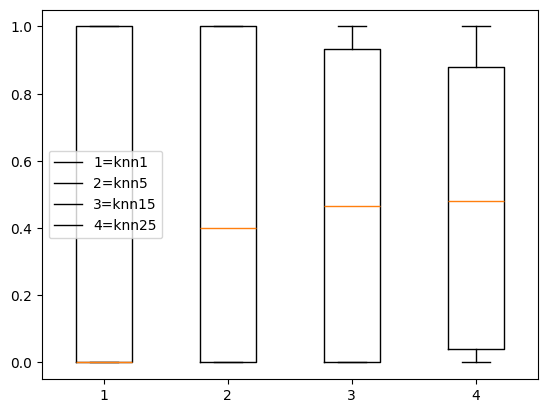

In [21]:

# Correct way to select multiple columns
X = train_data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']]
y = train_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train_scaled, y_train)

knn5 = KNeighborsClassifier(5)
knn5.fit(X_train_scaled, y_train)

knn15 = KNeighborsClassifier(15)
knn15.fit(X_train_scaled, y_train)

knn25 = KNeighborsClassifier(25)
knn25.fit(X_train_scaled, y_train)

pred1 = knn1.predict(X_train_scaled)
pred5 = knn5.predict(X_train_scaled)
pred15 = knn15.predict(X_train_scaled)
pred25 = knn25.predict(X_train_scaled)

plt.boxplot([knn1.predict_proba(X_train_scaled)[:,1],knn5.predict_proba(X_train_scaled)[:,1],
             knn15.predict_proba(X_train_scaled)[:,1],knn25.predict_proba(X_train_scaled)[:,1]])
plt.legend(["1=knn1","2=knn5","3=knn15","4=knn25"]);

In [ ]:
print("Classification accuracy for knn1 were: \n Train =", 
      knn1.score(X_train_scaled, y_train), ", Test =", 
      knn1.score(X_test_scaled, y_test))

print("Classification accuracy for knn5 were: \n Train =", 
      knn5.score(X_train_scaled, y_train), ", Test =", 
      knn5.score(X_test_scaled, y_test))

print("Classification accuracy for knn15 were: \n Train =", 
      knn15.score(X_train_scaled, y_train), ", Test =", 
      knn15.score(X_test_scaled, y_test))

print("Classification accuracy for knn25 were: \n Train =", 
      knn25.score(X_train_scaled, y_train), ", Test =", 
      knn25.score(X_test_scaled, y_test))



Classification accuracy for knn1 were: 
 Train = 1.0 , Test = 0.907618829063997
Classification accuracy for knn5 were: 
 Train = 0.9372680495544758 , Test = 0.8976793551533232
Classification accuracy for knn15 were: 
 Train = 0.8939132617387096 , Test = 0.8740426264306819
Classification accuracy for knn25 were: 
 Train = 0.8728077881564086 , Test = 0.8579214595106279


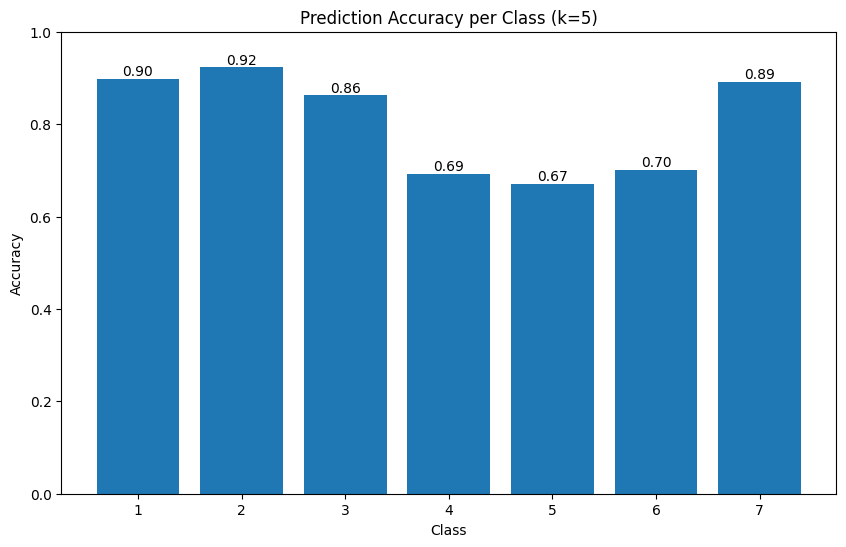

Class 1 accuracy: 0.898
Class 2 accuracy: 0.923
Class 3 accuracy: 0.863
Class 4 accuracy: 0.693
Class 5 accuracy: 0.671
Class 6 accuracy: 0.701
Class 7 accuracy: 0.892
0.8976793551533232


In [ ]:


y_pred = knn5.predict(X_test_scaled)

# accuracy for each class
accuracies = []
for class_num in range(1, 8):  # for classes 1-7
    # Get indices where true value is the current class
    class_indices = y_test == class_num
    # Calculate accuracy for this class
    class_accuracy = np.mean(y_pred[class_indices] == y_test[class_indices])
    accuracies.append(class_accuracy)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 8), accuracies)
plt.title('Prediction Accuracy per Class (k=5)')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1
plt.xticks(range(1, 8))
for i, acc in enumerate(accuracies):
    plt.text(i+1, acc, f'{acc:.2f}', ha='center', va='bottom')
plt.show()

# Print numeric values
for i, acc in enumerate(accuracies, 1):
    print(f"Class {i} accuracy: {acc:.3f}")


In [ ]:

# make predictions on test data
# choose k = 5, bc best balance of accuracy and not too different in overfitting data like k=1
test_pred = y_pred
test_pred_proba = knn5.predict_proba(X_test_scaled)

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, test_pred)
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)


Confusion Matrix (Test Data):
[[22621  2375     4     0    23     7   153]
 [ 2175 31545   150     3   139   132    20]
 [    5   223  3715    45    13   306     0]
 [    0     0    82   232     0    21     0]
 [   37   295    11     0   717     8     0]
 [   13   207   381    27     3  1480     0]
 [  244    32     0     0     0     0  2278]]


In [39]:
# metrics for entire model and per class confusion matrix
accuracy = accuracy_score(y_test, test_pred)
error_rate = 1 - accuracy

f1 = f1_score(y_test, test_pred, average='weighted')

print(f"\nTest Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Error Rate: {error_rate:.3f}")
print("\nPer-class True Negative Rates:")
print(f"\nF1 Score (weighted): {f1:.3f}")


Test Metrics:
Accuracy: 0.898
Error Rate: 0.102

Per-class True Negative Rates:

F1 Score (weighted): 0.897


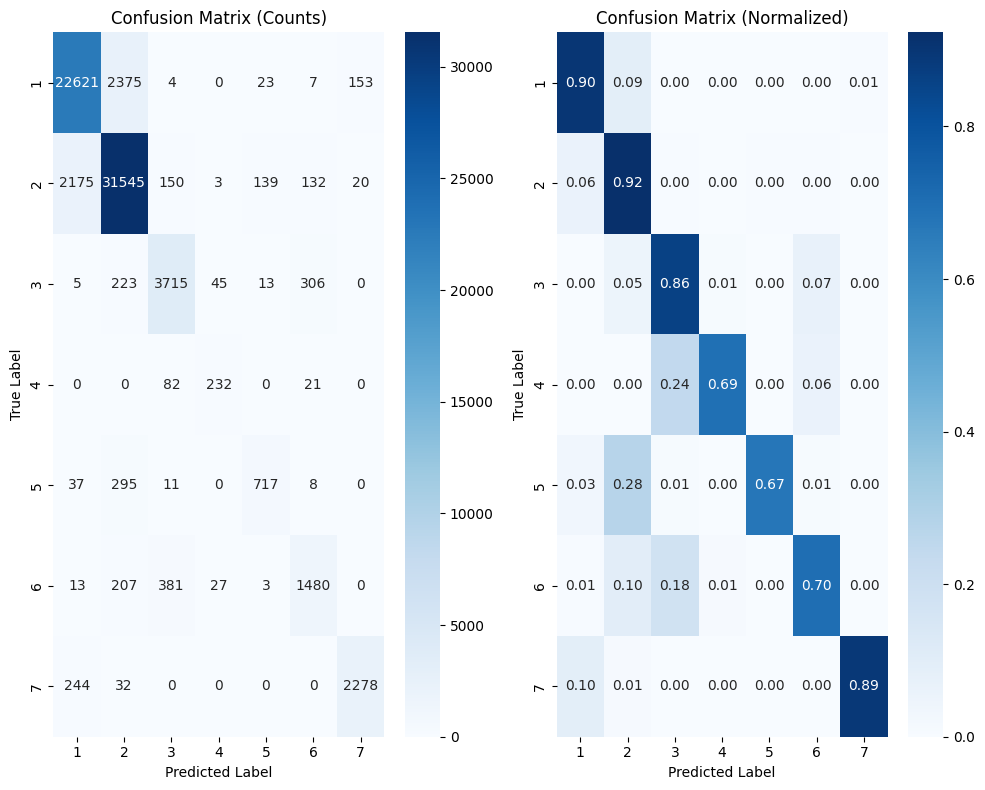


Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90     25183
           2       0.91      0.92      0.92     34164
           3       0.86      0.86      0.86      4307
           4       0.76      0.69      0.72       335
           5       0.80      0.67      0.73      1068
           6       0.76      0.70      0.73      2111
           7       0.93      0.89      0.91      2554

    accuracy                           0.90     69722
   macro avg       0.84      0.81      0.82     69722
weighted avg       0.90      0.90      0.90     69722



In [ ]:

# assembling confusion matrix per class with TP, TN, FP, FN rates

conf_matrix = confusion_matrix(y_test, y_pred)


labels = range(1, 8)  # for classes 1-7

plt.figure(figsize=(10, 8))

# raw counts of prediction
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Counts)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# plot percentages by normalizing
plt.subplot(1, 2, 2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


